In [3]:
import os
import pandas as pd
import torch

from fairseq_signals.utils.store import MemmapReader

/home/aa2650/playground/ECG-FM/virtualenv/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
root = '/home/aa2650/datasets/code_15/subset'
experiment_root = '/home/aa2650/datasets/code_15/experiments/subset'
fairseq_signals_root = '/home/aa2650/playground/fairseq-signals'
fairseq_signals_root = fairseq_signals_root.rstrip('/')
fairseq_signals_root
data_split = "80-10-10"

In [5]:
segmented_path = f'/home/aa2650/datasets/code_15/subset/test_segmented_split.csv'
segmented_split = pd.read_csv(segmented_path,
    index_col='idx',
)

In [6]:
each_experiment_path = os.path.join(experiment_root, data_split, "pre-trained")
os.makedirs(each_experiment_path, exist_ok=True)

model_path = f"/home/aa2650/playground/ECG-FM/ckpts/physionet_finetuned.pt"
print(each_experiment_path)


/home/aa2650/datasets/code_15/experiments/subset/80-10-10/pre-trained


In [7]:
# The bottom part only needs to be run once
segmented_path = f'/home/aa2650/datasets/code_15/subset/test_segmented_split.csv'
segmented_split = pd.read_csv(segmented_path,
    index_col='idx',
)
# segmented_split['path'] = ('/home/aa2650/datasets/code_15/segmented/') + segmented_split['path']
# segmented_split.to_csv(os.path.join('/home/aa2650/datasets/code_15/segmented_split.csv'))

In [8]:
# inference_cmd = f"""fairseq-hydra-inference \\
#     task.data="/home/aa2650/datasets/code_15/subset/manifests" \\
#     common_eval.path="{model_path}" \\
#     common_eval.results_path="{each_experiment_path}" \\
#     model.num_labels=6 \\
#     dataset.valid_subset="test" \\
#     dataset.batch_size=10 \\
#     dataset.num_workers=3 \\
#     dataset.disable_validation=false \\
#     distributed_training.distributed_world_size=1 \\
#     distributed_training.find_unused_parameters=True \\
#     --config-dir "/home/aa2650/playground/ECG-FM/ckpts/" \\
#     --config-name physionet_finetuned
# """

# os.system(inference_cmd)

In [9]:
assert os.path.isfile(f"{each_experiment_path}/outputs_test.npy")
assert os.path.isfile(f"{each_experiment_path}/outputs_test_header.pkl")

In [10]:
physionet2021_label_def = pd.read_csv(
    os.path.join('/home/aa2650/playground/ECG-FM/data/physionet2021/labels/label_def.csv'),
     index_col='name',
)
physionet2021_label_names = physionet2021_label_def.index
physionet2021_label_def

,pos_count_all,pos_percent_all
name,,
AF,5230,0.060793
AFL,8271,0.096142
BBB,490,0.005696
Brady,283,0.003290
CLBBB|LBBB,1487,0.017285
CRBBB|RBBB,4794,0.055725
IAVB,3516,0.040870
IRBBB,1854,0.021551
LAD,7614,0.088505


In [11]:
# Load the array of computed logits
logits = MemmapReader.from_header(f"{each_experiment_path}/outputs_test.npy")[:]
logits.shape

(5873, 26)

In [12]:
# Construct predictions from logits
pred = pd.DataFrame(
    torch.sigmoid(torch.tensor(logits)).numpy(),
    columns=physionet2021_label_names,
)

# Join in sample information
pred = segmented_split.reset_index().join(pred, how='left').set_index('idx')
pred

,save_file,split,path,sample_size,AF,AFL,BBB,Brady,CLBBB|LBBB,CRBBB|RBBB,...,PR,PRWP,PVC|VPB,QAb,RAD,SA,SB,STach,TAb,TInv
idx,,,,,,,,,,,,,,,,,,,,,
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.001044,1.354968e-02,1.660461e-01,3.859345e-04,9.999996e-01,0.000008,...,1.077341e-03,1.682374e-05,0.009837,1.788423e-04,1.717197e-11,2.155358e-07,0.014061,0.000263,0.006535,1.882881e-03
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000830,2.193181e-02,5.396100e-04,5.232714e-04,9.999990e-01,0.000044,...,6.025758e-04,2.264107e-08,0.000420,1.421887e-04,2.008687e-11,1.134963e-05,0.852634,0.000015,0.001611,1.080378e-02
29077,code_15_100123.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000609,2.632890e-05,1.015944e-13,1.559733e-04,9.999838e-01,0.000001,...,2.050426e-09,2.050519e-09,0.000229,9.288672e-12,2.416671e-11,1.910990e-05,0.043838,0.000391,0.000847,1.337214e-08
12710,code_15_1001938.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000825,2.816585e-05,3.283646e-13,4.907846e-06,8.991229e-10,0.006411,...,1.370619e-10,5.621000e-14,0.000011,7.970123e-09,2.462083e-09,4.263025e-06,0.000010,0.988875,0.000364,1.063464e-04
35541,code_15_1002557.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000042,5.020712e-05,4.629763e-10,7.015147e-09,3.885056e-08,0.000026,...,5.897307e-08,2.251912e-10,0.000014,3.500022e-05,3.816585e-14,1.648562e-05,0.000007,0.000002,0.017979,3.154047e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.003669,1.727456e-03,7.771686e-08,3.764030e-09,2.944881e-06,0.998867,...,5.705093e-05,5.732430e-15,0.000824,6.470404e-05,1.722767e-08,8.487244e-05,0.000024,0.000822,0.024288,2.389359e-01
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.031366,7.815902e-02,4.359059e-05,2.775268e-09,1.369642e-05,0.998891,...,5.133293e-04,6.889555e-14,0.007912,2.131658e-04,1.864160e-07,2.421673e-04,0.000077,0.000785,0.079139,3.190964e-01
37132,code_15_998911.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000265,2.139954e-07,8.227211e-14,1.698489e-05,8.598909e-05,0.178944,...,9.620050e-11,1.518713e-13,0.000417,1.000050e-06,4.958607e-13,5.228497e-05,0.000035,0.000038,0.000041,1.975772e-04


In [13]:
# Perform a (crude) thresholding of 0.5 for all labels
pred_thresh = pred.copy()
pred_thresh[physionet2021_label_names] = pred_thresh[physionet2021_label_names] > 0.5

# Construct a readable column of predicted labels for each sample
pred_thresh['labels'] = pred_thresh[physionet2021_label_names].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
pred_thresh['labels']

idx
4329         CLBBB|LBBB, IAVB, LAD
4329     CLBBB|LBBB, IAVB, LAD, SB
29077                   CLBBB|LBBB
12710                        STach
35541                          NSR
                   ...            
15687            CRBBB|RBBB, IRBBB
15687            CRBBB|RBBB, IRBBB
37132                          NSR
418                     CRBBB|RBBB
37915                          NSR
Name: labels, Length: 5873, dtype: object

In [14]:
code_15_label_def = pd.read_csv("/home/aa2650/playground/ECG-FM/data/code_15/labels/label_def.csv",
     index_col='name',
)
code_15_label_names = code_15_label_def.index
code_15_label_def

,pos_count_all,pos_percent_all
name,,
is_male,138528,0.402691
1dAVb,5699,0.016567
RBBB,9652,0.028058
LBBB,6011,0.017474
SB,5588,0.016244
ST,7571,0.022008
AF,7008,0.020372
normal_ecg,134497,0.390973


In [15]:
label_mapping = {
    'CRBBB|RBBB': 'RBBB',
    'CLBBB|LBBB': 'LBBB',
    'SB': 'SB',
    'STach': 'ST',
    'AF': 'AF'
}

physionet2021_label_def['name_mapped'] = physionet2021_label_def.index.map(label_mapping)
physionet2021_label_def

,pos_count_all,pos_percent_all,name_mapped
name,,,
AF,5230,0.060793,AF
AFL,8271,0.096142,NaN
BBB,490,0.005696,NaN
Brady,283,0.003290,NaN
CLBBB|LBBB,1487,0.017285,LBBB
CRBBB|RBBB,4794,0.055725,RBBB
IAVB,3516,0.040870,NaN
IRBBB,1854,0.021551,NaN
LAD,7614,0.088505,NaN


In [16]:
pred_mapped = pred.copy()
pred_mapped.drop(set(physionet2021_label_names) - set(label_mapping.keys()), axis=1, inplace=True)
pred_mapped.rename(label_mapping, axis=1, inplace=True)
pred_mapped

,save_file,split,path,sample_size,AF,LBBB,RBBB,SB,ST
idx,,,,,,,,,
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.001044,9.999996e-01,0.000008,0.014061,0.000263
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000830,9.999990e-01,0.000044,0.852634,0.000015
29077,code_15_100123.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000609,9.999838e-01,0.000001,0.043838,0.000391
12710,code_15_1001938.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000825,8.991229e-10,0.006411,0.000010,0.988875
35541,code_15_1002557.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000042,3.885056e-08,0.000026,0.000007,0.000002
...,...,...,...,...,...,...,...,...,...
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.003669,2.944881e-06,0.998867,0.000024,0.000822
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.031366,1.369642e-05,0.998891,0.000077,0.000785
37132,code_15_998911.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,0.000265,8.598909e-05,0.178944,0.000035,0.000038


In [17]:
pred_thresh_mapped = pred_thresh.copy()
pred_thresh_mapped.drop(set(physionet2021_label_names) - set(label_mapping.keys()), axis=1, inplace=True)
pred_thresh_mapped.rename(label_mapping, axis=1, inplace=True)
pred_thresh_mapped['predicted'] = pred_thresh_mapped[label_mapping.values()].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
pred_thresh_mapped

,save_file,split,path,sample_size,AF,LBBB,RBBB,SB,ST,labels,predicted
idx,,,,,,,,,,,
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,True,False,False,False,"CLBBB|LBBB, IAVB, LAD",LBBB
4329,code_15_1000730.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,True,False,True,False,"CLBBB|LBBB, IAVB, LAD, SB","LBBB, SB"
29077,code_15_100123.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,True,False,False,False,CLBBB|LBBB,LBBB
12710,code_15_1001938.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,False,False,False,True,STach,ST
35541,code_15_1002557.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,False,False,False,False,NSR,
...,...,...,...,...,...,...,...,...,...,...,...
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,False,True,False,False,"CRBBB|RBBB, IRBBB",RBBB
15687,code_15_997787.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,False,True,False,False,"CRBBB|RBBB, IRBBB",RBBB
37132,code_15_998911.mat,test,/home/aa2650/datasets/code_15/subset/segmented...,2500,False,False,False,False,False,NSR,


In [18]:
code_15_labels = pd.read_csv(os.path.join('/home/aa2650/datasets/code_15/subset/ground_truth_test_labels.csv'), index_col='idx')
code_15_labels['actual'] = code_15_labels[label_mapping.values()].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
code_15_labels

,RBBB,LBBB,SB,ST,AF,normal_ecg,actual
idx,,,,,,,
37252,False,False,False,False,False,True,
37252,False,False,False,False,False,True,
22756,False,True,False,False,False,False,LBBB
22756,False,True,False,False,False,False,LBBB
2342,True,False,False,False,True,False,"RBBB, AF"
...,...,...,...,...,...,...,...
418,True,False,False,False,False,False,RBBB
12704,True,False,False,False,False,False,RBBB
32348,False,True,False,False,False,False,LBBB


In [19]:
# Visualize predicted and actual labels side-by-side
pred_thresh_mapped[['predicted']].join(code_15_labels[['actual']], how='left')

# Calculate accuracy
# Compare predicted and actual labels
comparison = pred_thresh_mapped[['predicted']].join(code_15_labels[['actual']], how='left')

# Calculate overall accuracy (exact match)
accuracy = (comparison['predicted'] == comparison['actual']).mean()
print(f"Overall accuracy: {accuracy:.2%}")

Overall accuracy: 78.52%


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

y_true_str = comparison['actual']
y_pred_str = comparison['predicted']

y_true_list = [labels.split(", ") for labels in y_true_str]
y_pred_list = [labels.split(", ") for labels in y_pred_str]

mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true_list)
y_pred_bin = mlb.transform(y_pred_list)

class_names = mlb.classes_

results = []

for i, cls_name in enumerate(class_names):
    y_true_col = y_true_bin[:, i]
    y_pred_col = y_pred_bin[:, i]
    
    tn, fp, fn, tp = confusion_matrix(y_true_col, y_pred_col).ravel()
    total = tp + tn + fp + fn
    prevalence = (tp + fn) / total
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    accuracy = (tp + tn) / total

    results.append({
        'class': cls_name,
        'prevalence': round(prevalence, 3),
        'f1': round(f1, 3),
        'precision': round(precision, 3),
        'recall': round(recall, 3),
        'specificity': round(specificity, 3),
        'accuracy': round(accuracy, 3)
    })

metrics_df = pd.DataFrame(results)
print(metrics_df)

  class  prevalence     f1  precision  recall  specificity  accuracy
0             0.231  0.779      0.731   0.834        0.908     0.891
1    AF       0.157  0.925      0.979   0.876        0.997     0.978
2  LBBB       0.151  0.908      0.894   0.922        0.981     0.972
3  RBBB       0.202  0.876      0.796   0.974        0.937     0.944
4    SB       0.134  0.677      0.652   0.704        0.942     0.910
5    ST       0.176  0.858      0.941   0.789        0.990     0.954


In [46]:
target_classes = ['AF', 'LBBB', 'RBBB', 'SB', 'ST']

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute multilabel confusion matrix
mcm = multilabel_confusion_matrix(
    y_true=code_15_labels[target_classes],
    y_pred=pred_thresh_mapped[target_classes]
)

# Optionally: Visualise each class' confusion matrix
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, cls in enumerate(target_classes):
    cm = mcm[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {cls}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


[[[4249  796]
  [ 697  131]]

 [[4251  724]
  [ 760  138]]

 [[3419  919]
  [1215  320]]

 [[4447  693]
  [ 639   94]]

 [[4133  901]
  [ 693  146]]]


In [30]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

In [34]:
pred_mapped[target_classes]

,AF,LBBB,RBBB,SB,ST
idx,,,,,
4329,0.001044,9.999996e-01,0.000008,0.014061,0.000263
4329,0.000830,9.999990e-01,0.000044,0.852634,0.000015
29077,0.000609,9.999838e-01,0.000001,0.043838,0.000391
12710,0.000825,8.991229e-10,0.006411,0.000010,0.988875
35541,0.000042,3.885056e-08,0.000026,0.000007,0.000002
...,...,...,...,...,...
15687,0.003669,2.944881e-06,0.998867,0.000024,0.000822
15687,0.031366,1.369642e-05,0.998891,0.000077,0.000785
37132,0.000265,8.598909e-05,0.178944,0.000035,0.000038


In [36]:
code_15_labels[target_classes]

,AF,LBBB,RBBB,SB,ST
idx,,,,,
37252,False,False,False,False,False
37252,False,False,False,False,False
22756,False,True,False,False,False
22756,False,True,False,False,False
2342,True,False,True,False,False
...,...,...,...,...,...
418,False,False,True,False,False
12704,False,False,True,False,False
32348,False,True,False,False,False


In [38]:
auroc_scores = {}
for cls in target_classes:
    try:
        auroc_scores[cls] = roc_auc_score(code_15_labels[cls], pred_mapped[cls])
    except ValueError as e:
        print(f"Error computing AUROC for {cls}: {e}")

print(auroc_scores)

{'AF': np.float64(0.4984808968139618), 'LBBB': np.float64(0.5079384518791836), 'RBBB': np.float64(0.49409512383989906), 'SB': np.float64(0.5026948181244476), 'ST': np.float64(0.495566734787016)}


0 AF
1 LBBB
2 RBBB
3 SB
4 ST

AUROC and AUPRC metrics:
       class   AUROC   AUPRC
0         AF  0.4985  0.1576
1       LBBB  0.5079  0.1514
2       RBBB  0.4941  0.2073
3         SB  0.5027  0.1317
4         ST  0.4956  0.1786
5  macro avg  0.4998  0.1653


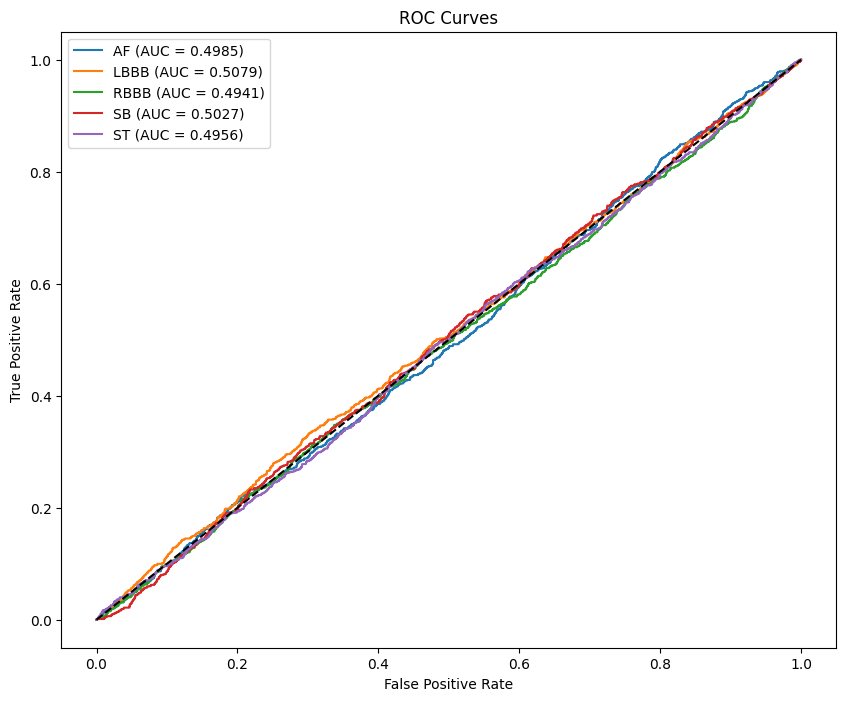

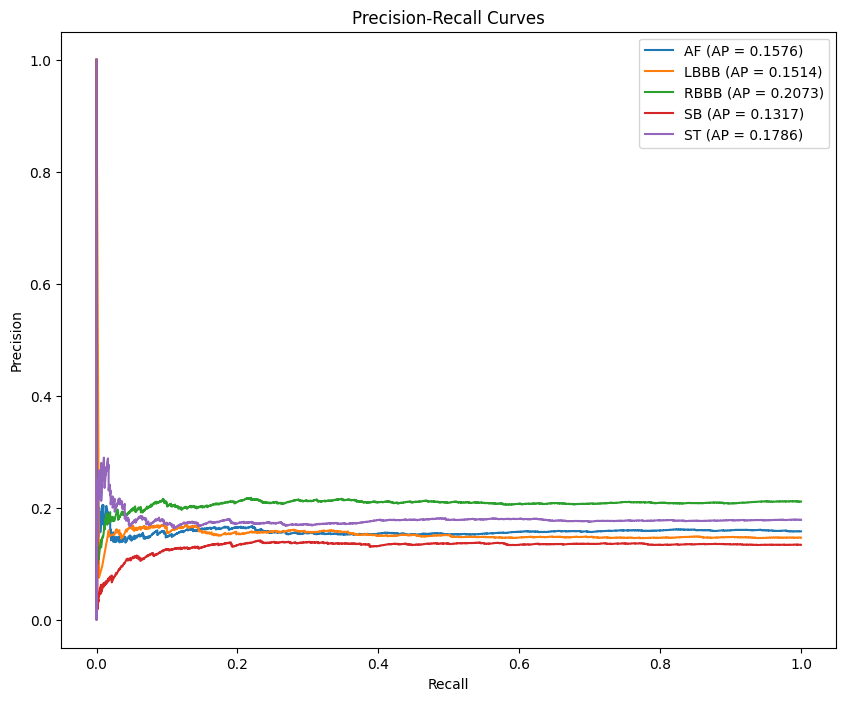

In [ ]:
# First, let's get the prediction probabilities from pred_mapped
# We'll use the same classes as in the metrics calculation (AF, LBBB, RBBB, SB, ST)
target_classes = ['AF', 'LBBB', 'RBBB', 'SB', 'ST']

# Get prediction probabilities for each class
y_pred_probs = pred_mapped[target_classes].values

# Get ground truth labels from code_15_labels
y_true = code_15_labels[target_classes].values


results = []
for i, cls_name in enumerate(target_classes):
    # Calculate metrics for each class
    print(i,)
    auroc = roc_auc_score(y_true[:, i], y_pred_probs[:, i])
    auprc = average_precision_score(y_true[:, i], y_pred_probs[:, i])
    
    results.append({
        'class': cls_name,
        'AUROC': round(auroc, 4),
        'AUPRC': round(auprc, 4)
    })

# Calculate macro averages
macro_auroc = np.mean([r['AUROC'] for r in results])
macro_auprc = np.mean([r['AUPRC'] for r in results])

# Add macro average row
results.append({
    'class': 'macro avg',
    'AUROC': round(macro_auroc, 4),
    'AUPRC': round(macro_auprc, 4)
})

# Display results
auroc_auprc_df = pd.DataFrame(results)
print("\nAUROC and AUPRC metrics:")
print(auroc_auprc_df)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i, cls_name in enumerate(target_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'{cls_name} (AUC = {results[i]["AUROC"]})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for i, cls_name in enumerate(target_classes):
    precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'{cls_name} (AP = {results[i]["AUPRC"]})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()